## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#Ensure merging happens without losing data
print(f"Number of columns in mouse_metadata : {mouse_metadata.shape[0]}")
print(f"Number of columns in study_results : {study_results.shape[0]}")

Number of columns in mouse_metadata : 249
Number of columns in study_results : 1893


In [4]:
# Combine the data into a single dataset
Mouse_study_result = pd.merge(mouse_metadata,study_results , how ='outer', on ="Mouse ID")

# Display the data table for preview

print(f"Number of columns in Mouse_study_result : {Mouse_study_result.shape[0]}")
Mouse_study_result

Number of columns in Mouse_study_result : 1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


#### Having same Number of rows as study_results ensures no irrelevent Mouse ID was added.

In [5]:
# Checking the number of mice befire dropping the 'Duplicates'.
Total_Mice = pd.DataFrame({ "Total Mice ID" : [Mouse_study_result['Mouse ID'].count()]})
Total_Mice

,Total Mice ID
0,1893


#### Total mice ID before dropping the duplicates.


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Timepoint = Mouse_study_result.loc[Mouse_study_result.duplicated(subset=["Mouse ID","Timepoint"] , keep= False),["Mouse ID","Timepoint"]]

pd.DataFrame({"Duplicate Mouse ID" : Duplicate_Timepoint["Mouse ID"].unique()})

,Duplicate Mouse ID
0,g989


#### Using 'keep =False' in .duplicated() function , we can identify all the duplicated values in 'Mouse ID' and 'Timepoint' columns

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_Timepoint

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_study_result_clean = Mouse_study_result.drop_duplicates(subset=["Mouse ID","Timepoint"])
Mouse_study_result_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
Total_Mice_clean = pd.DataFrame({ "Total Mice ID" : [Mouse_study_result_clean['Mouse ID'].count()],
                                  "Total Unique Mice ID" :[len(Mouse_study_result_clean['Mouse ID'].unique())]
                                })
Total_Mice_clean

,Total Mice ID,Total Unique Mice ID
0,1888,249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#calculating  mean, median, variance, standard deviation, and SEM of the tumor volume.
Grouped_Regimen = Mouse_study_result_clean.groupby("Drug Regimen")
Tumer_mean = Grouped_Regimen["Tumor Volume (mm3)"].mean()
Tumer_median = Grouped_Regimen["Tumor Volume (mm3)"].median()
Tumer_var = Grouped_Regimen["Tumor Volume (mm3)"].var()
Tumer_std = Grouped_Regimen["Tumor Volume (mm3)"].std()
Tumer_SEM = Grouped_Regimen["Tumor Volume (mm3)"].sem()

#Creating a DataFrame
Regimen_summary_statistics = pd.DataFrame({
                                           "Tumor Volume Mean" : Tumer_mean,
                                           "Tumor Volume Median" : Tumer_median,
                                           "Tumor Volume Variance" : Tumer_var,
                                           "Tumor Volume Standard Deviation" : Tumer_std,
                                           "Tumor Volume Standard Error" : Tumer_SEM,
})
#Printing the DataFrame
Regimen_summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
Grouped_Regimen_Agg = Mouse_study_result_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

#Renaming columns to look good
Grouped_Regimen_Agg = Grouped_Regimen_Agg.rename(columns = {"mean":"Mean" ,"median":"Median","var":"Variance","std":"Standard Deviation","sem":"Standard Error"})
Grouped_Regimen_Agg

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                             
             Standard Error  
Drug Regimen                 
Capomulin          0.329346  
Ceftamin           0.469821  
Infubinol          0.492236  
Ketapril           0.603860  
Naftisol           0.596466  
Placebo            0.581331  
Propriva           0.525862  
Ramicane           0.320955  
Stelasyn           0.573111  
Zoniferol          0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Get Values for Y- Axis
Regimen_count = Grouped_Regimen["Mouse ID"].count()
y_axis = Regimen_count.sort_values(ascending=False)
y_axis

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Mouse ID, dtype: int64

In [13]:
#Get values for X- Axis
x_axis = y_axis.index
x_axis

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object', name='Drug Regimen')

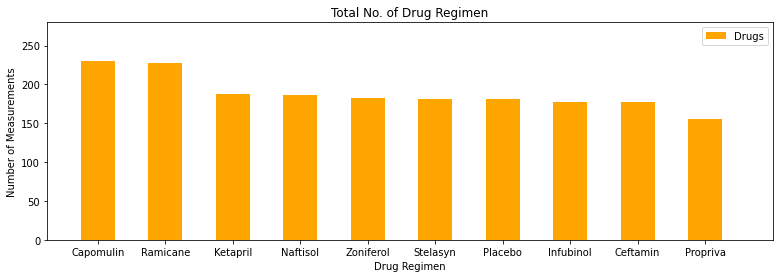

<Figure size 432x288 with 0 Axes>

In [14]:
#Ploting Bar Chart with title and labels
regimen_chart = y_axis.plot.bar(title="Total No. of Drug Regimen" , label='Drugs',figsize =(13,4) , rot=0,  color = 'orange')

#Custommizing the chart
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Measurements")
plt.legend(loc ='best')
plt.xlim(-0.75,len(x_axis))
plt.ylim(0,max(y_axis)+50)

plt.show()
plt.tight_layout()

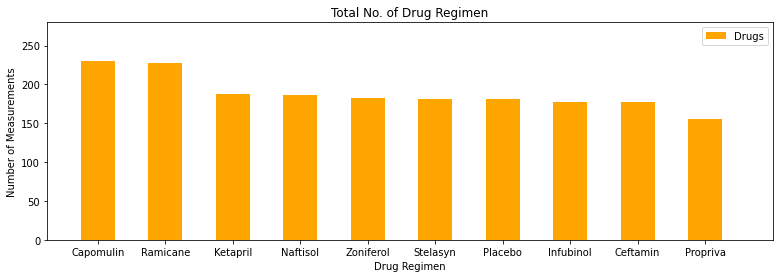

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(13,4))
plt.bar(x_axis , y_axis, label='Drugs',  color = 'orange', width = 0.5)
plt.title("Total No. of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-0.75,len(x_axis))
plt.ylim(0,max(y_axis)+50)
plt.legend(loc ='best')
plt.show()
plt.tight_layout()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Find Female vs male ratio
Gender_ratio = Mouse_study_result_clean["Sex"].value_counts()
Gender_ratio

Male      958
Female    930
Name: Sex, dtype: int64

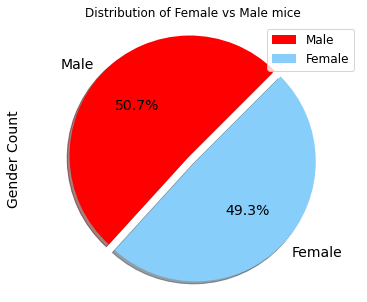

In [17]:
#Plotting pie plot using pands
colors = ["red", "lightskyblue"]
explode = (0, 0.07)
gender_pie = Gender_ratio.plot(kind="pie" ,
                  y='"Gender Count"',
                  explode=explode, 
                  autopct="%1.1f%%", 
                  shadow=True, 
                  startangle=45 , 
                  colors = colors,           
                  figsize=(6, 5),                  
                  title = "Distribution of Female vs Male mice",
                  fontsize = 14,)

gender_pie.set_ylabel("Gender Count", fontsize = 14)
plt.legend(loc="best" , fontsize = 12)
plt.axis("equal")
plt.show()

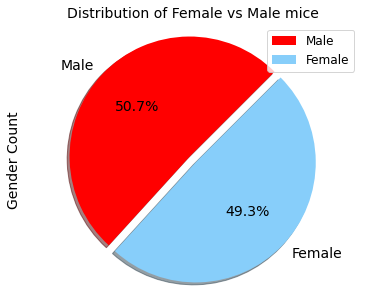

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Male", "Female"]
plt.figure(figsize=(6,5))
plt.pie(Gender_ratio , 
                  explode=explode, 
                  autopct="%1.1f%%", 
                  shadow=True, 
                  startangle=45 , 
                  colors = colors, labels = labels,
                  textprops={'fontsize': 14})
plt.title("Distribution of Female vs Male mice", fontsize = 14)
plt.ylabel("Gender Count", fontsize = 14)
plt.legend(loc="best" , fontsize = 12)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Mouse_study_result_clean.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
Final_timepoint = Mouse_study_result_clean[Mouse_study_result_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby("Mouse ID")
#Final Tumor volume without merge to get the tumor volume at the last timepoint
Final_volume1 = Final_timepoint.max()
#Final_volume1.reset_index()

In [21]:
#Final Tumor volume to  merge dataframe later to get the tumor volume at the last timepoint
Final_volume = pd.DataFrame(Final_timepoint.Timepoint.max())
Final_volume = Final_volume.reset_index()
Final_volume

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Final_volume_df = pd.merge(Final_volume,Mouse_study_result_clean , on =("Mouse ID","Timepoint") , how="left" ,)
Final_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [23]:
Mouse_study_result_clean.reset_index(drop =True , inplace=True)

In [24]:
#Fetching 4 Important Drug Regimen
Final_volume1["Drug Regimen"].unique()

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [25]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = Final_volume1["Drug Regimen"].unique()
# Create empty list to fill with tumor vol data (for plotting)
Infubinol_turmer_vol =[]
Ceftamin_turmer_vol =[]
Ramicane_turmer_vol =[]
Capomulin_turmer_vol =[]

#Tumor vol data for 4 Regimens    
# Locate the rows which contain mice on each drug and get the tumor volumes        
for i in range(len(Final_volume_df)):
        
    if Final_volume_df.loc[i,"Drug Regimen"]== Treatments[0]:
            Infubinol_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])            
    elif Final_volume_df.loc[i,"Drug Regimen"]== Treatments[1]:
            Ceftamin_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])
    elif Final_volume_df.loc[i,"Drug Regimen"]== Treatments[2]:
            Ramicane_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])
    elif Final_volume_df.loc[i,"Drug Regimen"]== Treatments[3]:
            Capomulin_turmer_vol.append(Final_volume_df.loc[i,"Tumor Volume (mm3)"])
            
           

In [26]:
#Convert Lists to Series to calculate Quartiles
Infubinol_turmer_vol_S = pd.Series(Infubinol_turmer_vol)
Ceftamin_turmer_vol_S = pd.Series(Ceftamin_turmer_vol)
Ramicane_turmer_vol_S = pd.Series(Ramicane_turmer_vol)
Capomulin_turmer_vol_S = pd.Series(Capomulin_turmer_vol)

In [27]:
#Function to calculate 
def Quarle_Calc(x):    
    Quartiles = x.quantile([0.25,0.5,0.75])
    FirstQ = Quartiles[0.25]
    Median = Quartiles[0.5]
    ThirdQ = Quartiles[0.75]
    IQR = ThirdQ-FirstQ
    Lower_Boundry = FirstQ - (1.5 * IQR)
    Upper_Boundry = ThirdQ + (1.5 * IQR)
    
    return IQR , Lower_Boundry , Upper_Boundry    

In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
Infubinol_IQR , Infubinol_Lower_Boundry , Infubinol_Upper_Boundry = Quarle_Calc(Infubinol_turmer_vol_S)
print(f"Inter Quartile Range of 'Infubinol' : {Infubinol_IQR}")
print(f"Values below {Infubinol_Lower_Boundry} could be Outliers")
print(f"Values above {Infubinol_Upper_Boundry} could be Outliers")

Inter Quartile Range of 'Infubinol' : 11.477135160000003
Values below 36.83290494999999 could be Outliers
Values above 82.74144559000001 could be Outliers


In [29]:
Ceftamin_IQR , Ceftamin_Lower_Boundry , Ceftamin_Upper_Boundry = Quarle_Calc(Ceftamin_turmer_vol_S)
print(f"Inter Quartile Range of 'Ceftamin' : {Ceftamin_IQR}")
print(f"Values below {Ceftamin_Lower_Boundry} could be Outliers")
print(f"Values above {Ceftamin_Upper_Boundry} could be Outliers")

Inter Quartile Range of 'Ceftamin' : 15.577752179999997
Values below 25.355449580000002 could be Outliers
Values above 87.66645829999999 could be Outliers


In [30]:
Ramicane_IQR , Ramicane_Lower_Boundry , Ramicane_Upper_Boundry = Quarle_Calc(Ramicane_turmer_vol_S)
print(f"Inter Quartile Range of 'Ramicane' : {Ramicane_IQR}")
print(f"Values below {Ramicane_Lower_Boundry} could be Outliers")
print(f"Values above {Ramicane_Upper_Boundry} could be Outliers")

Inter Quartile Range of 'Ramicane' : 9.098536719999998
Values below 17.912664470000003 could be Outliers
Values above 54.30681135 could be Outliers


In [31]:
Capomulin_IQR , Capomulin_Lower_Boundry , Capomulin_Upper_Boundry = Quarle_Calc(Capomulin_turmer_vol_S)
print(f"Inter Quartile Range of 'Capomulin' : {Capomulin_IQR}")
print(f"Values below {Capomulin_Lower_Boundry} could be Outliers")
print(f"Values above {Capomulin_Upper_Boundry} could be Outliers")

Inter Quartile Range of 'Capomulin' : 7.781863460000004
Values below 20.70456164999999 could be Outliers
Values above 51.83201549 could be Outliers


In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Diaplay all four Drugs in one plot
data =[Infubinol_turmer_vol,Ceftamin_turmer_vol,Ramicane_turmer_vol,Capomulin_turmer_vol_S]

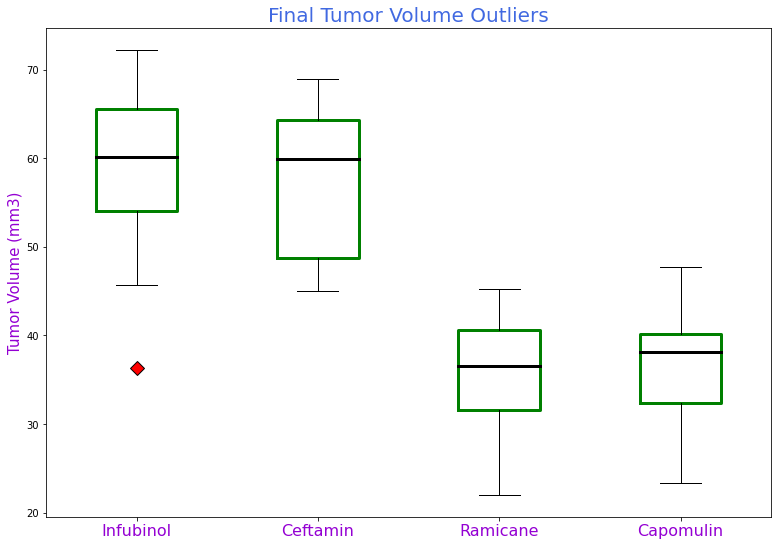

In [33]:
#Customize Box plot
font = dict(fontsize= 20,fontweight = 3,color = 'royalblue')
boxprops = dict(linestyle='-', linewidth=3, color='g')
medianprops = dict(linestyle='-', linewidth=3, color='k')
green_diamond = dict(markerfacecolor='r', marker='D' ,markersize= 10)
labels = [label for label in Treatments ] 

#Plot the values
fig1,ax1 = plt.subplots(figsize = (13,9))
ax1.set_title('Final Tumor Volume Outliers' , fontdict=font)
ax1.set_ylabel("Tumor Volume (mm3)" ,fontdict=dict(fontsize= 15,fontweight = 3,color = 'darkviolet'))
ax1.boxplot(data , flierprops=green_diamond ,boxprops= boxprops,medianprops = medianprops,labels= labels)
plt.xticks(fontsize=16 , color = "darkviolet")
plt.show()

## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Create a df for Capomulin
Capomulin_df = Mouse_study_result_clean.loc[Mouse_study_result_clean["Drug Regimen"] == "Capomulin" ,['Mouse ID',"Drug Regimen",'Weight (g)','Tumor Volume (mm3)','Timepoint']]

#Extract mouse ID-s185 and its 'Tumor Volume (mm3)' and 'Timepoint'
Capomulin_Single_Mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID']== "s185" , ['Tumor Volume (mm3)','Timepoint']].reset_index(drop =True)

#Find x-Axis  and Y-Axis
y_axis = Capomulin_Single_Mouse_df["Tumor Volume (mm3)"]
x_axis = Capomulin_Single_Mouse_df["Timepoint"]

#Set index for plotting
Capomulin_Single_Mouse_df = Capomulin_Single_Mouse_df.set_index("Timepoint")
Capomulin_Single_Mouse_df

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,43.878496
10,37.614948
15,38.177232
20,36.866876
25,33.949940
30,32.959671
35,28.328531
40,25.472143


(20.0, 49.0)

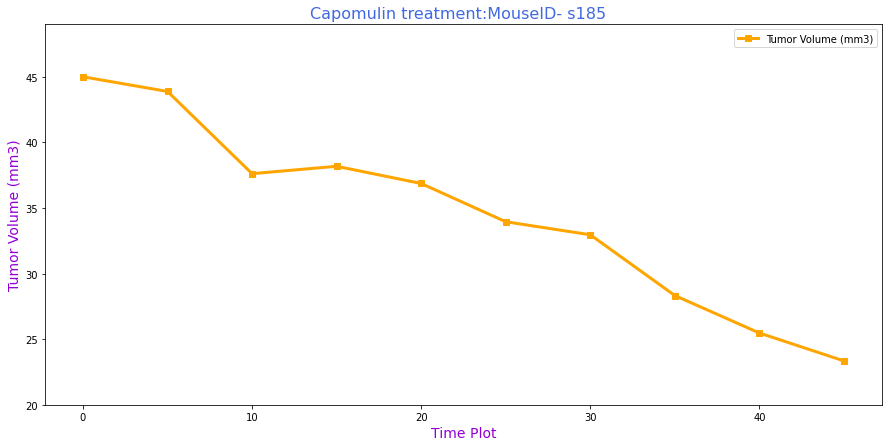

In [35]:
#Generate a line plot
Capomulin_plot = Capomulin_Single_Mouse_df.plot(figsize = (15,7), legend= True , marker ="s" ,linewidth = 3 , color = 'orange')
Capomulin_plot.set_title("Capomulin treatment:MouseID- s185  ", fontsize = 16 , color ='royalblue')
Capomulin_plot.set_xlabel("Time Plot",fontsize = 14 , color ='darkviolet')
Capomulin_plot.set_ylabel('Tumor Volume (mm3)',fontsize = 14 , color ='darkviolet')
Capomulin_plot.set_ylim(20, max(Capomulin_Single_Mouse_df['Tumor Volume (mm3)'])+4)

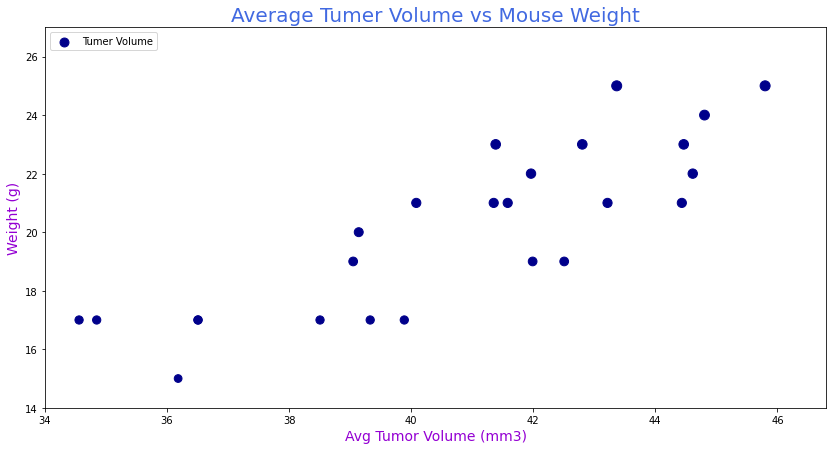

<Figure size 432x288 with 0 Axes>

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Scatter = Capomulin_df[['Mouse ID','Weight (g)','Tumor Volume (mm3)']].groupby('Mouse ID')
x_axis_scatter =Capomulin_Scatter['Tumor Volume (mm3)'].mean()
y_axis_scatter = Capomulin_Scatter['Weight (g)'].first()

s = [n*4 for n in y_axis_scatter]
plt.figure(figsize=(14,7))
plt.scatter(x_axis_scatter, y_axis_scatter, color = 'darkblue' , marker ='o',s =s  , label = "Tumer Volume")
plt.title("Average Tumer Volume vs Mouse Weight" , fontsize =20 ,color ="royalblue" )
plt.ylabel('Weight (g)',fontsize =14 ,color ="darkviolet" )
plt.xlabel('Avg Tumor Volume (mm3)',fontsize =14 ,color ="darkviolet" )
plt.legend(loc ='upper left' , fontsize = 10)
plt.ylim(14 , max(y_axis_scatter)+2)
plt.xlim(34 , max(x_axis_scatter)+1)

plt.show()
plt.tight_layout()

## Correlation and Regression

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coefficiant for Capomulin regimen
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between mouse weight and average tumor volume:  {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume:  0.84


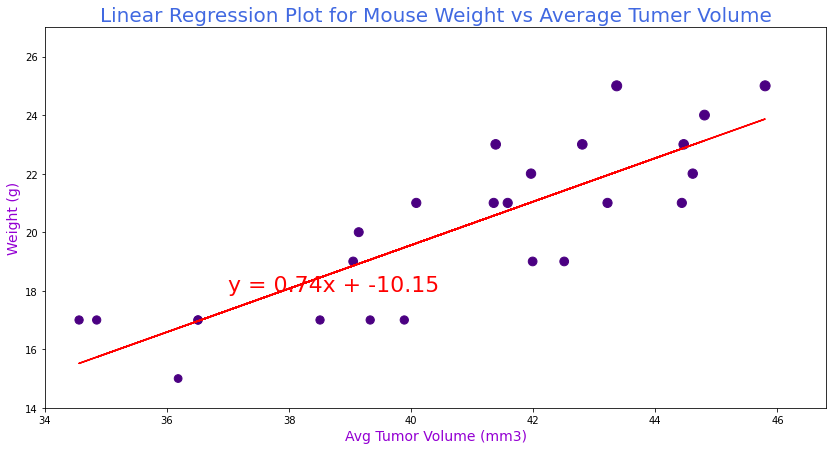

<Figure size 432x288 with 0 Axes>

In [84]:
#Linear regression model for  Mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(14,7))
plt.scatter(x_axis_scatter, y_axis_scatter,color = 'indigo' , marker ='o',s =s  , label = "Tumer Volume")
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(37,18),fontsize=22,color="red")
plt.title("Linear Regression Plot for Mouse Weight vs Average Tumer Volume" , fontsize =20 ,color ="royalblue" )
plt.xlabel('Avg Tumor Volume (mm3)',fontsize =14 ,color ="darkviolet")
plt.ylabel('Weight (g)',fontsize =14 ,color ="darkviolet" )
plt.ylim(14 , max(y_axis_scatter)+2)
plt.xlim(34 , max(x_axis_scatter)+1)

plt.show()
plt.tight_layout()